基于原型的聚类算法：KMeans算法

假设你有一组客户数据，每个客户都有一些特征，比如年龄、收入和购买历史。现在，你想将这些客户分成两组。对于分类问题，你可以设定一个规则，比如将年龄小于30岁的客户归为一组，年龄大于30岁的客户归为另一组。这样，你的目标就是判断每个客户属于哪个年龄段。对于聚类问题，你可以不设定任何规则，而是让算法根据客户之间的相似性自动将他们分成两组。比如，算法可能会发现有一组客户年龄较轻且收入较高，另一组客户年龄较老且收入较低。这样，你的目标就是找到数据中的自然分组或集群。分类问题通常基于明确规则或阈值进行分类，而聚类问题则基于数据之间的相似性进行分组，以发现数据中的自然集群。

k-means 算法是根据给定的 n 个数据对象的数据集，构建 k 个划分聚类的方法，每个划分聚类即为一个簇。该方法将数据划分为 n 个簇，每个簇至少有一个数据对象，每个数据对象必须属于而且只能属于一个簇。同时要满足同一簇中的数据对象相似度高，不同簇中的数据对象相似度较小。聚类相似度是利用各簇中对象的均值来进行计算的。

K-Means算法的基本流程如下：

  选择K值：需要确定要将数据集分成多少个类别，即簇的数量K。这一参数往往在最开始就需要设定好。

初始化质心：随机从数据集中选择K个点作为初始的簇中心。这些点通常是数据集中的任意点，但最常见的是选择K个数据点的均值作为初始质心。

分配数据点：接下来，算法会遍历数据集中的每个点，并根据这些点与簇中心的距离，将其分配给最近的簇中心。这个过程叫做“分配”。计算每个数据点到每个质心的距离时，通常使用欧几里得距离或余弦相似度等度量方法。

 重新计算质心：一旦数据点被分配给了各自的簇，算法会重新计算每个簇的质心。这是通过取每个簇中所有点的坐标的平均值来完成的。新的质心将被设置为每个簇所有点的平均位置。

 迭代优化：然后，算法回到步骤3，再次分配数据点，并重新计算质心。这个过程会重复进行多次，直到达到预设的迭代次数或质心位置的变化小于某个预设的阈值。这个阈值用于判断质心是否已经稳定，即是否已经收敛。

 输出结果：最后，算法会输出K个簇和每个数据点的归属。每个数据点将属于与其最近的质心所在的簇。同时，还会输出每个簇的质心位置，这些质心表示了每个簇的中心点或平均形态。


KMeans算法对初始质心的选择和K值的确定非常敏感。不同的初始质心可能会导致完全不同的聚类结果，而K值的选取也会影响聚类的质量和效果。通过迭代并尝试不同的K值和初始质心，以找到最佳的聚类结果。最佳K值往往通过肘部图法获得，也就是绘制silhoutte稀疏随k的变化曲线找到曲线拐点即可。

Cluster centers:
[[0.42599217 0.18580806]
 [0.28725888 0.69263244]
 [0.82298818 0.54435619]]
[2 1 0 2 2 0 2 1 2 1 1 1 2 0 2 1 0 0 2 0 2 2 2 2 0 2 2 0 2 1 2 2 0 2 2 2 1
 2 0 1 1 1 1 2 2 0 0 0 0 2 0 2 2 1 0 0 2 1 2 0 2 1 2 1 1 1 0 2 2 1 2 1 1 1
 2 2 2 2 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 2 1 1 0 2 1 2]


<Figure size 2000x1000 with 0 Axes>

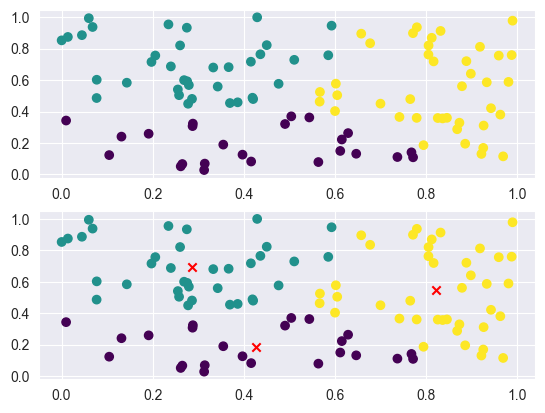

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,2)
kmeans = KMeans(n_clusters =3)
kmeans.fit(x)
# 输出聚类中心点  
print("Cluster centers:")  
print(kmeans.cluster_centers_)
labels = kmeans.predict(x)
print(labels)
# 分别获取数据点的 x 和 y 坐标
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2,1)
x_coords, y_coords = x[:, 0], x[:, 1]
# 绘制数据点
ax[0].scatter(x_coords, y_coords, c=labels, cmap='viridis')  # 使用不同的颜色表示不同的簇
# 获取聚类中心的 x 和 y 坐标
center_x, center_y = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]
ax[1].scatter(center_x, center_y, c='red',marker='x')
ax[1].scatter(x_coords,y_coords, c=labels,cmap='viridis')
plt.show()

[[0.82256378 0.47663928]
 [0.26344857 0.21237987]
 [0.33507698 0.78729276]]
[2. 0. 2. 2. 2. 2. 1. 1. 0. 1. 1. 2. 2. 1. 0. 1. 2. 0. 1. 2. 1. 2. 1. 1.
 2. 1. 2. 0. 0. 2. 2. 1. 2. 1. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 2. 0. 2. 2. 1. 0. 2. 2. 2. 2. 0. 0. 1. 0. 0. 1. 1. 2. 0.
 1. 1. 0. 0. 0. 1. 2. 2. 1. 1. 0. 2. 2. 1. 1. 1. 0. 2. 2. 1. 2. 2. 1. 0.
 1. 1. 1. 2.]


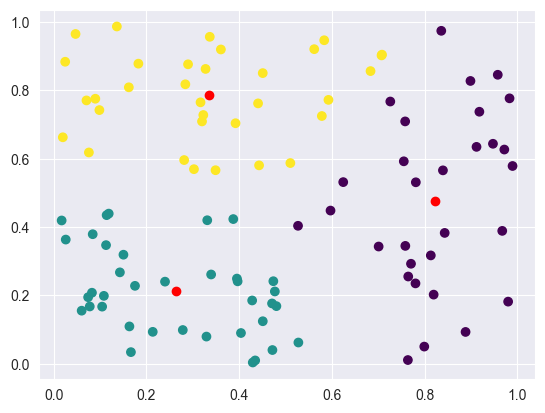

In [28]:
import numpy as np
def init_cent(dataset,K):
    idx=np.random.choice(np.arange(len(dataset)),size=K,replace=False)
    return dataset[idx]
def Kmeans_1(dataset,K,init_cent):
    centroids=init_cent(dataset,K)
    cluster=np.zeros(len(dataset))
    changed=True
    while changed:
        changed=False
        loss=0
        for i,data in enumerate(dataset):
            dis=np.sum((centroids-data)**2,axis=-1)
            k=np.argmin(dis)
            if cluster[i]!=k:
                cluster[i]=k
                changed=True
            loss+=np.sum((data-centroids[k])**2)
        for i in range(K):
            centroids[i]=np.mean(dataset[cluster==i],axis=0)
    return centroids,cluster
init_cent_1 = init_cent(x,3)
centerpoint,cluster_1 = Kmeans_1(x,3,init_cent) #第三个量是要调用函数
print(centerpoint)
print(cluster_1)
x_wei,y_wei = x[:,0],x[:,1]
plt.scatter(x_wei,y_wei,c=cluster_1,cmap='viridis')
plt.scatter(centerpoint[:,0],centerpoint[:,1],c='red')

层次聚类法是一种基于距离的聚类算法，它将数据点按照距离的远近进行层次式的分组，使得同一组内的数据点尽可能相似或接近，不同组之间的数据点尽可能不同或远离。为什么需要引入层次聚类法：在许多实际应用中，我们可能需要对数据进行更细致的分类或者处理具有层次结构的数据。例如，在市场细分中，我们可能希望将消费者按照购买行为、偏好和特征进行更精细的分类；在社交网络分析中，我们可能希望找到具有相似兴趣或行为的用户群体。层次聚类法可以帮助我们实现这些目标，因为它能够揭示数据的层次结构和细微差别，并提供更为精确和细致的聚类结果。

层次聚类法按照聚类的顺序可以分为自底向上和自顶向下两种类型。

    自底向上的层次聚类（凝聚层次聚类）：先单独考虑每个对象，然后逐渐合并这些原子簇，直到所有对象都在一个簇中或满足终止条件。这种方法的优点是不需要预先设定簇的数量，适合发现任意形状的簇，并且对异常值不敏感。缺点是计算量大，容易受到初始值的影响，可能陷入局部最优解。
    自顶向下的层次聚类（分裂层次聚类）：开始时将所有对象视作一个簇，然后逐渐分裂这个簇，直到每个对象都是一个簇或满足终止条件。优点是可以发现任意形状的簇，能够处理大规模数据集。缺点是需要预先设定簇的数量，容易受到初始值的影响，可能陷入局部最优解。

这两种方法没有孰优孰劣之分，只是在实际应用的时候要根据数据特点以及你想要的“类”的个数，来考虑是自上而下更快还是自下而上更快。判断”类”的方法就是：最短距离法、最长距离法、中间距离法、类平均法等，其中类平均法往往被认为是最常用也最好用的方法，一方面因为其良好的单调性，另一方面因为其空间扩张/浓缩的程度适中。

自顶而下的层次聚类输入样本数据和聚类数量后进行以下操作。

（1）将样本归为一类。

（2）在一个类中计算样本的距离，找到距离最远的a和b。

（3）将a和b分到两个不同的簇中。

（4）剩下样本到a和到b哪个距离更小就去哪个簇。

（5）递归生成聚类树。

自底而上的层次聚类则按照以下顺序进行。

（1）一个样本作为一个类。

（2）计算两两之间的距离，最小的两个点合并为一个类别。

（3）重复上一个操作，直到所有数据被归为一类。

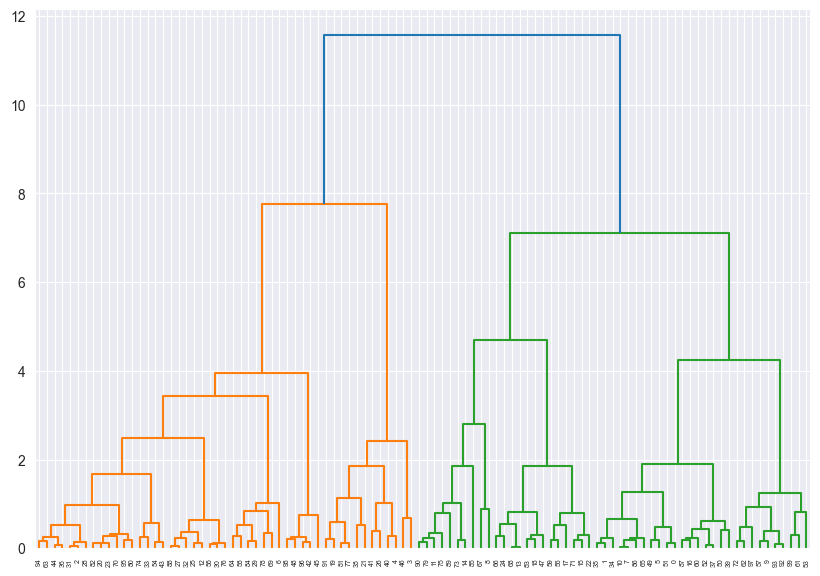

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage ,dendrogram
x = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]],100)#[[1,0.5],[0.5,1]]表示协方差，在对角线上的是方差
# 执行层次聚类  
linked = linkage(x, 'ward') #Ward方法是最小化合并后的簇内方差增加的方法，通常用来创建具有最小方差的簇。
fig = plt.figure(figsize=(10, 7))  
dendrogram(linked,  
                      orientation='top',   #从上到下
                      distance_sort='descending',  #降序
                      show_leaf_counts=True)  
plt.show()

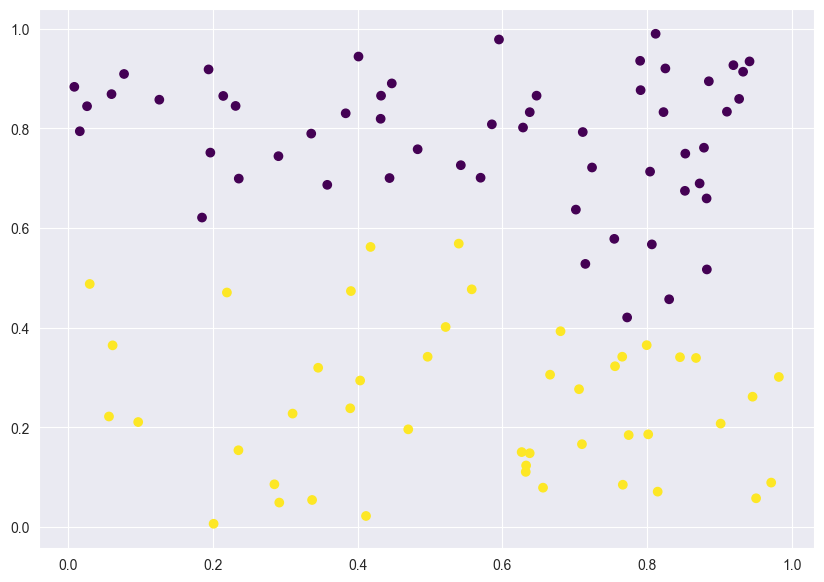

In [26]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
cluster_2 = AgglomerativeClustering(n_clusters = 2, linkage='ward', memory='auto')
'''affinity='euclidean': 这指定了用于计算样本间相似度的度量方法。在这里使用的是欧几里得距离。'''
cluster_2.fit(x)
labels = cluster_2.labels_
fig = plt.figure(figsize=(10, 7))  
plt.scatter(x[:, 0], x[:, 1], c=labels,cmap='viridis')  
plt.show()


DBSCAN算法是密度聚类算法，所谓密度聚类算法，就是说这个算法是根据样本的密集程度来进行聚类。但在介绍具体的算法之前，先来介绍一些基本的定义和概念。要根据样本中的数据密度进行聚类，首先定义样本中数据密度大的地方应该怎样表示，于是引出了两个概念：

（1）ε-邻域：若Xi是一个样本点，邻域就是指距离Xi不超过ε的范围。本质上，就是衡量离A样本有多远。

（2）核心对象：如果Xi的ε-邻域内至少含有M个样本，则Xi是一个核心对象。这个M也被定义为密集的阈值。

有了这两个定义以后，下面定义核心对象之间的几何关系。

（1）密度直达：如果B样本位于A样本的ε-邻域内，则称A样本和B样本密度直达。

（2）若A样本和B样本密度直达，B样本和C样本密度直达，A样本和C样本之间不是密度直达，则称A样本和C样本密度可达。

（3）若B样本和A、C样本均密度可达，则称A样本和C样本密度相连。

本质上，这个算法就是统计数据中的核心对象并将其归类，但这个算法有一个特点就是非核心对象会被判定为离群点，所以安排一个特殊的离群类并记为-1。具体的代码操作如下。

DBSCAN是一种基于密度的聚类算法，它通过样本点的密集程度来进行聚类。在深入探讨DBSCAN算法之前，让我们先了解一下与密度聚类相关的一些基本概念。

我们定义一个样本点Xi的ε-邻域，这指的是与Xi的距离不超过ε的所有样本点构成的区域。这个ε值帮助我们衡量样本之间的接近程度。

我们引入核心对象的概念。如果一个样本点Xi的ε-邻域内包含至少M个样本，那么Xi被称为核心对象。这里的M被称为密度阈值，它决定了什么樣的样本点被视为密集区域的一部分。

了解核心对象后，我们可以定义它们之间的几种特殊几何关系：

1. 密度直达：如果样本点B位于样本点A的ε-邻域内，那么我们说A和B是密度直达的。

2. 密度可达：如果样本点B是样本点A的密度直达点，且B也是样本点C的密度直达点，但A和C之间不是密度直达，那么我们说A和C是密度可达的。

3. 密度相连：如果样本点B同时与样本点A和C密度可达，那么我们说A和C是密度相连的。

DBSCAN算法的基本原理就是识别这些核心对象和它们之间的密度连接，并将它们聚类。算法还会将非核心对象（即那些ε-邻域内少于M个样本的点）视为离群点，并将它们归为特殊的离群类，通常标记为-1。

在实际应用中，DBSCAN算法的代码实现涉及以下几个步骤：

1. 选择合适的ε值和M值。

2. 计算每个样本点的ε-邻域。

3. 确定核心对象。

4. 建立密度连接关系。

5. 合并密度相连的核心对象为同一聚类。

6. 将离群点分类。

通过上述步骤，DBSCAN能够有效地对数据集进行聚类，识别出数据中的模式和结构。

我们可以使用sklearn.cluster模块中的DBSCAN类执行DBSCAN聚类。在创建DBSCAN对象时，我们指定两个参数：eps和min_samples。eps参数指定了两个样本被认为是邻居的最大距离，而min_samples参数指定了一个样本点被视为核心点所需的最小邻居数。通过调整这些参数，我们可以控制聚类的结果。

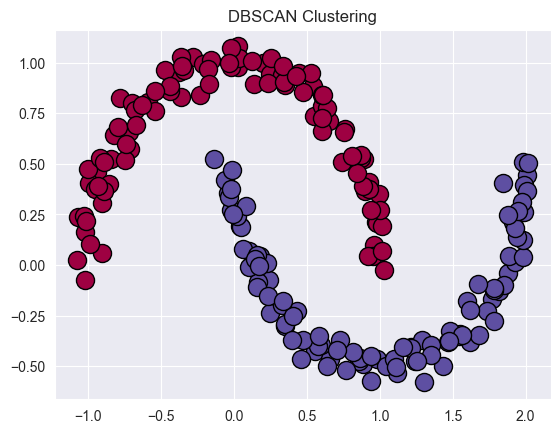

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

x_moon , y_moon  = make_moons(n_samples=200,noise=0.05,random_state=0)
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbscan.fit(x_moon)
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] #添加一个渐变的颜色映射
for k,col in zip(unique_labels,colors):
    if k==-1:
        col=[0, 0, 0, 1]
        # col 是一个RBGA的颜色值，这表示把噪声点设为黑色
        '''zip(unique_labels, colors) 创建了一个迭代器，该迭代器将 unique_labels 和 colors 中的元素配对。
每次迭代都会返回一个元组 (k, col)，其中 k 是一个唯一的标签，而 col 是与该标签对应的颜色。'''
    class_member_mask = (labels == k) #(labels == k) 创建了一个布尔数组，其中 True 对应于标签等于 k 的元素。
    # (labels != -1) 创建了一个布尔数组，其中 True 对应于标签不等于 -1（即不是噪声点）的元素。
    xy = x_moon[class_member_mask] #    xy = x_moon[class_member_mask & (labels != -1)]
    plt.plot(xy[:, 0], xy[:, 1], 'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=13)
plt.title('DBSCAN Clustering')
plt.show()

高斯混合聚类法

大家还记得正态分布吗？正态分布不仅有一元正态分布，还有多元正态分布。实际上，任何一组样本其实都可以看做是若干个正态分布的叠加。高斯混合聚类就是基于这种思想，GMM也可以看作是K-means的推广，因为GMM不仅是考虑到了数据分布的均值，也考虑到了协方差。和K-means一样，我们需要提前确定簇的个数。GMM的基本假设为数据是由几个不同的高斯分布的随机变量组合而成，而聚类的任务就是确定数据的叠加方法。
接下来的操作就是要通过优化W找到最佳的似然函数极小值了。这里选择使用EM算法。EM（Expectation-Maximization）算法是一种迭代优化算法，主要用于寻找参数的最大似然估计。它的基本思想是：在每一步迭代中，先对参数进行估计，然后根据这些估计值来更新模型，接着再用新的模型来估计参数，如此反复迭代，直到参数收敛或达到预设的迭代次数。

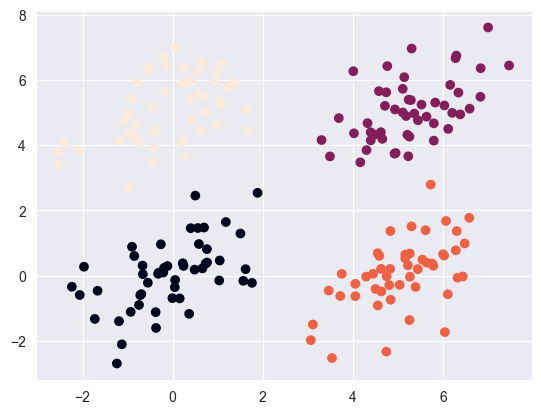

In [36]:
from sklearn.mixture import GaussianMixture  
import numpy as np  
import matplotlib.pyplot as plt  
# 生成随机样本数据  
np.random.seed(0)  
X = np.concatenate([  
    np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([0, 5], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([5, 0], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], 50)  
])  
# 使用GaussianMixture进行聚类  
gmm = GaussianMixture(n_components=4)  
gmm.fit(X)  
labels = gmm.predict(X)  
# 可视化聚类结果  
plt.scatter(X[:, 0], X[:, 1], c=labels)  
plt.show()